In [18]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

We consider the following circuit
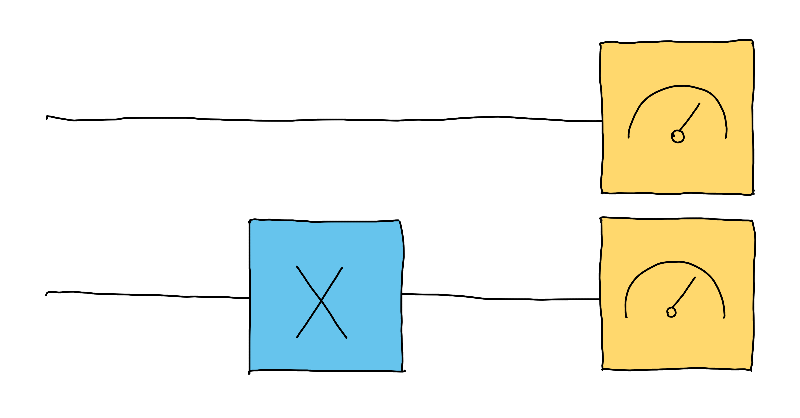

where the first qubit is in the state $|0\rangle$ and the second one in the state $|1\rangle$.

This is how we implement measurements

In [ ]:
dev = qml.device("default.qubit", wires=2, shots=1)

@qml.qnode(dev)
def simple_circuit():
    
    qml.PauliX(1)
    
    return my_measurement

Where my_measurement could be any of the following:
- qml.sample
- qml.counts
- qml.probs
- qml.expval

If we want to define the observable
$$
O = \frac{1}{2} X\otimes X + \frac{1}{4} Y \otimes Y
$$

In [ ]:
O = 1/2 * qml.X(0) @ qml.X(1) + 1/4 * qml.Y(0) @ qml.Y(1)

Samples

[1 1 1 0 1 1 1 0 1 0]


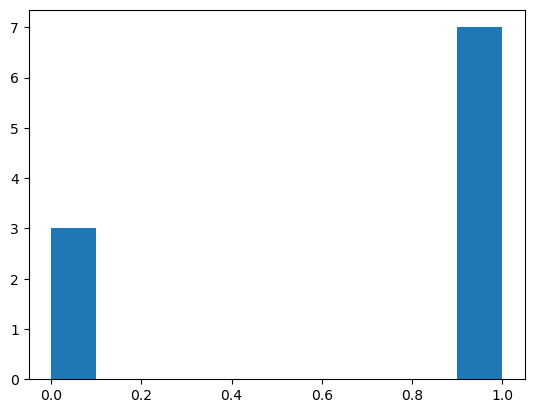

In [53]:
dev = qml.device("default.qubit", wires=1, shots=10)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0) # state after Hadamard is equal superposition of |0> and |1>
    return qml.sample()

results = circuit()
print(results) # should expect 50% 0 and 50% 1
plt.hist(results)
plt.show()

We can also sample from the Pauli X observable.

In [17]:
dev = qml.device("default.qubit", wires=1, shots=10)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0) # state after Hadamard is equal superposition of |0> and |1>
    return qml.sample(qml.PauliX(0))

print(circuit()) # should expect 50% 0 and 50% 1

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Counts

In [55]:
dev = qml.device("default.qubit", wires=1, shots=1000)

@qml.qnode(dev)
def circuit_counts():
    qml.Hadamard(wires=0)
    return qml.counts()

print(circuit_counts())

{np.str_('0'): array(496), np.str_('1'): array(504)}


In [63]:
dev = qml.device("default.qubit", wires=1, shots=1000)

@qml.qnode(dev)
def circuit_counts():
    qml.Hadamard(wires=0)
    return qml.counts(qml.PauliX(0))

print(circuit_counts())

{np.float64(1.0): array(1000)}


Probablities

In the simple circuit we defined above, we have a 100% probabilty of measuring the $|01\rangle$ state.

In [ ]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def simple_circuit():
    qml.PauliX(1)
    return qml.probs()

print(simple_circuit()) 

[0. 1. 0. 0.]
[1. 0.]


We can also call probabilities for single wires


In [68]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def simple_circuit():
    
    qml.PauliX(1)

    return qml.probs(wires = 0)

print(simple_circuit())

[1. 0.]


If we measure the probability of the PauliX observable on both qubits separately, we get an array [0.25 0.25 0.25 0.25]. This means that we have the same probability of obtaining any of the states $|\pm \pm \rangle$ from the $|01\rangle$ state.

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def prob_circuit_paulix():
    
    qml.PauliX(1)

    return qml.probs(op = qml.PauliX(0)@qml.PauliX(1))

print(prob_circuit_paulix())


[0.25 0.25 0.25 0.25]


Expectation values

In [72]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def simple_circuit_expval():
    qml.PauliX(1)
    return qml.expval(qml.PauliZ(0))

simple_circuit_expval()


array(1.)

In [73]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def expval_circuit():
    
    qml.RY(np.pi/4, wires = 0)
    qml.RX(np.pi/3, wires = 1)
    qml.CNOT(wires = [0, 1])
    
    return qml.expval(1/3*qml.PauliZ(0) @ qml.PauliZ(1))


expval_circuit()

/opt/anaconda3/envs/plane/lib/python3.13/site-packages/pennylane/ops/op_math/composite.py:209: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)


np.float64(0.1666666666666667)

In [75]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def expval_circuit():

    qml.PauliX(wires = 1)
    
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))


expval_circuit()

(array(1.), array(-1.))

In [128]:
dev = qml.device("default.qubit", wires=2) # Define a two-qubit device here

A = np.array([[1, 0], [0, -1]])

@qml.qnode(dev)
def circuit():
    """
    This quantum function implements a Bell state and
    should return the expectation value the observable
    corresponding to the matrix A applied to the first qubit
    """
    qml.H(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.expval(qml.Hermitian(A, wires=0))

circuit()

np.float64(0.0)

In [132]:

dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def circuit():
    """
    This quantum function implements a Bell state and
    should return the probabilities for the PauliZ 
    observable on both qubits, using a single measurement
    """
    qml.H(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.probs(op=qml.PauliZ(0) @ qml.PauliZ(1))

circuit()

array([0.5, 0. , 0. , 0.5])